# Compute limits for the app

In [20]:
import pandas as pd

In [111]:
per_geom = pd.read_csv("https://figshare.com/ndownloader/files/30904903")

In [45]:
blue = [
    'func_workplace_abde',
    'func_workplace_c',
    'func_workplace_f',
    'func_workplace_hj',
]
white = [
    "func_workplace_klmn",
    "func_workplace_opq",
]

In [46]:
white = per_geom[white].sum(axis=1)
blue = per_geom[blue].sum(axis=1)
job_types = white / (white + blue)

In [57]:
wp = per_geom[[c for c in per_geom.columns if c.startswith("func_workplace")]].fillna(0).sum(axis=1)

In [58]:
tot_pop = per_geom.func_population.fillna(0) + wp
prop_pop = per_geom.func_population.fillna(0) / tot_pop
prop_wp = wp / tot_pop

In [64]:
use = prop_pop - prop_wp

In [68]:
signature_type = per_geom["id"].apply(lambda x: x[-3:])

In [96]:
limits = {}
for st in signature_type.unique():
    mask = signature_type == st
    limits[st] = {
            "jobs_min": job_types[mask].min(),
            "jobs_max": job_types[mask].max(),
            "jobs_q1": job_types[mask].quantile(.25),
            "jobs_q3": job_types[mask].quantile(.75),
            "jobs_d1": job_types[mask].quantile(.1),
            "jobs_d9": job_types[mask].quantile(.9),
            "use_min": use[mask].min(),
            "use_max": use[mask].max(),
            "use_q1": use[mask].quantile(.25),
            "use_q3": use[mask].quantile(.75),
            "use_d1": use[mask].quantile(.1),
            "use_d9": use[mask].quantile(.9),
        }


<AxesSubplot: >

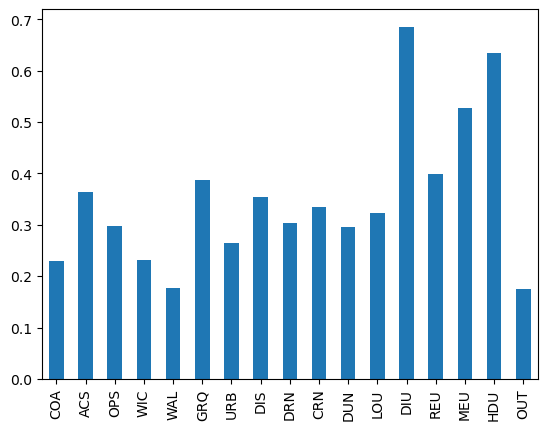

In [97]:
pd.DataFrame(limits).T.jobs_d1.plot.bar()

<AxesSubplot: >

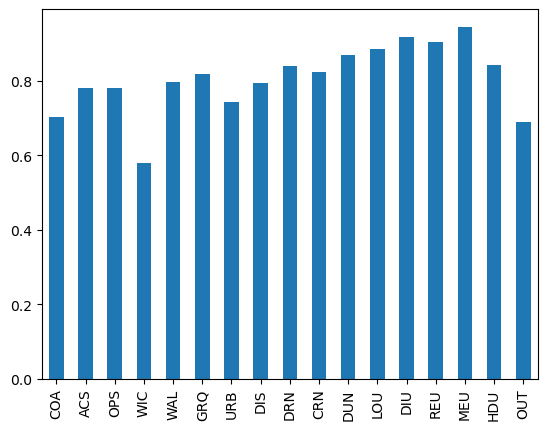

In [98]:
pd.DataFrame(limits).T.jobs_d9.plot.bar()

<AxesSubplot: >

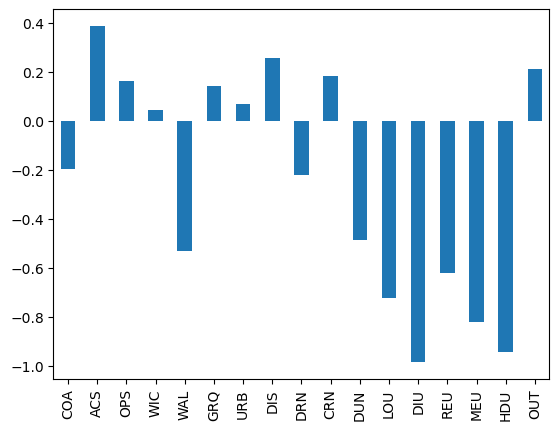

In [99]:
pd.DataFrame(limits).T.use_d1.plot.bar()

<AxesSubplot: >

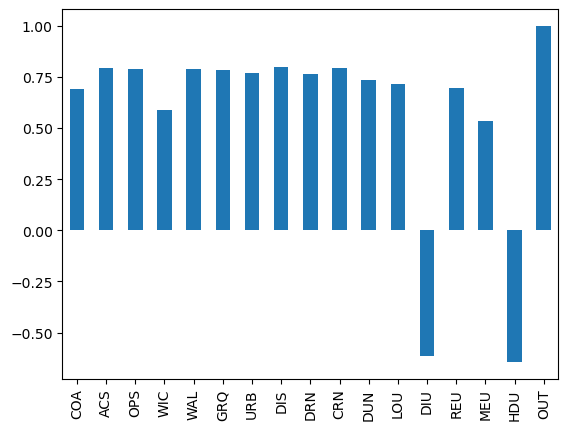

In [100]:
pd.DataFrame(limits).T.use_d9.plot.bar()

In [101]:
limits = pd.DataFrame(limits).T

In [102]:
limits

,jobs_min,jobs_max,jobs_q1,jobs_q3,jobs_d1,jobs_d9,use_min,use_max,use_q1,use_q3,use_d1,use_d9
COA,0.025844,0.968173,0.336391,0.581164,0.229143,0.703176,-0.995025,1.000000,0.154406,0.567008,-0.198685,0.690642
ACS,0.055901,0.982603,0.471259,0.692276,0.364019,0.780205,-0.972135,0.923831,0.552800,0.743535,0.386209,0.796435
OPS,0.023188,0.987074,0.438465,0.680213,0.298462,0.779911,-0.989846,1.000000,0.452626,0.729198,0.161191,0.790676
WIC,0.021818,0.962025,0.298932,0.472222,0.230769,0.580198,-0.958938,0.908751,0.237339,0.494426,0.044991,0.589221
WAL,0.014652,0.987074,0.345325,0.689301,0.176471,0.798077,-0.999227,0.940246,0.095542,0.718943,-0.533086,0.790505
GRQ,0.053872,0.974894,0.514596,0.739899,0.386978,0.819079,-0.903541,0.942442,0.420060,0.721036,0.142342,0.784788
URB,0.017888,0.980328,0.388007,0.624335,0.264525,0.742268,-0.996880,1.000000,0.361784,0.692875,0.068894,0.768925
DIS,0.038265,0.991753,0.478981,0.705426,0.353659,0.793412,-0.912657,0.998965,0.504159,0.746353,0.254493,0.802231
DRN,0.023112,0.982869,0.470345,0.744474,0.304227,0.839463,-0.990203,0.954000,0.223552,0.693047,-0.219699,0.767701
CRN,0.010922,0.982603,0.484848,0.728477,0.334788,0.822622,-0.970399,0.926950,0.463957,0.738018,0.183696,0.793427


In [112]:
key = pd.read_csv("https://figshare.com/ndownloader/files/30904912")

In [113]:
key

,type_name,type_code
0,Countryside agriculture,COA
1,Accessible suburbia,ACS
2,Open sprawl,OPS
3,Wild countryside,WIC
4,Warehouse/Park land,WAL
5,Gridded residential quarters,GRQ
6,Urban buffer,URB
7,Disconnected suburbia,DIS
8,Dense residential neighbourhoods,DRN
9,Connected residential neighbourhoods,CRN


In [105]:
limits.index = limits.index.map(dict(zip(key.type_code, key.type_name)))

In [110]:
with open("limits.json", "w") as f:
    f.write(limits.drop("outlier").to_json())